# KMeans Clustering Algorithm

## Objective
In this colab we will be implementing kmeans Clustering Algorithms

## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

In [15]:
np.random.seed(2901)

## Algorithm
k-means clustering algorithm is an iterative algorithm that proceeds as follows:

**Input**:
 * $n$ training examples represented with $m$ features.
 * Number of centroids: $k$.


In [4]:
cluster_count = 3

## Generate the data

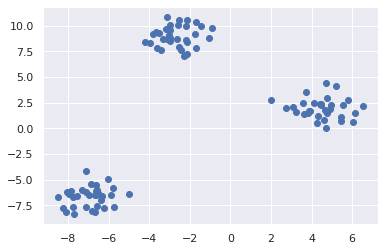

In [5]:
X, y = make_blobs(n_samples = 100, n_features = 2 , centers = 3, random_state = 42)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [6]:
m = np.array([[1,2],[3,4],[6,5],[4,2]])
c = m[np.random.randint(0,m.shape[0],size = 3)]
p = m[np.array([1,2])]
p

array([[3, 4],
       [6, 5]])

**Algorithm**:
 1. Randomly initialize k centroids. Note that each centroid is a vector in $m$ dimensional space.
 2. Repeat until convergence:
   
   i. Assign points to the closest centroids.
   ii. Calculate the centroids based on the points assigned to the cluster.

The algorithm converges when the centroid stops changing or in other words the cluster memebership stabilizes and subsequent iterations do not yield any changes.


In [34]:
def fit(X,k):
  # take three random points from data set and take them as initial centroids
  np.random.seed(21)
  centroids = X[np.random.randint(0,X.shape[0],size=k)] 

  #calculate initial label of each data point
  labels = np.argmin(cdist(X,centroids), axis=1)

  for _iteration in range(10):
    #copy labels for all points for comparing later
    #print(labels)
    previous_labels =labels.copy()
    #print(centroids)
    #compute new centroids
    centroids = np.array([np.mean(X[labels==r], axis=0) for r in range(k)])  

    #at last recalculate label of each data point 
    labels = np.argmin(cdist(X,centroids),axis=1) 

    #check if labels of points are not cchanging
    if all (labels ==previous_labels):
      break
  return centroids, labels

  
  

In [29]:
centroids, labels = fit(X,3) 


[1 1 2 1 1 1 2 1 1 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 1 1 1 1 1 1 1 1 2 2 0
 0 1 1 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 0 1 0 0 0 1 2 1 1 1 0 1 2 2 2 1 1 2]
[[-2.16557933  7.25124597]
 [ 3.08921541  2.04173266]
 [-3.52202874  9.32853346]]
[1 1 2 1 1 1 2 1 1 2 2 1 1 0 2 1 1 2 1 1 2 1 1 2 2 2 1 1 1 1 1 1 1 1 2 2 0
 0 1 1 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 0 1 2 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 0 1 0 0 0 0 2 1 1 1 0 0 2 2 2 1 1 2]
[[-2.21776115  7.8135286 ]
 [-1.22609981 -2.36864828]
 [-2.85532174  9.4033574 ]]
[1 1 2 1 1 1 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 1 1 1 1 1 0 0 1 2 2 0
 2 0 1 1 2 1 2 2 0 1 1 1 1 0 1 2 1 1 1 2 0 1 2 1 1 1 0 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 0 0 2 1 0 1 2 0 0 0 2 1 1 0 2 0 2 2 2 0 1 2]
[[-0.86756032  7.00546476]
 [-1.50110931 -2.67387187]
 [-2.8222691   9.47228252]]
[1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 

In [27]:
print(centroids)

[[ 4.49951001  1.93892013]
 [-6.95170962 -6.67621669]
 [-2.66780392  8.93576069]]


In [33]:
x = np.array([[2,4]])
cdist(x,centroids),np.argmin(cdist(x,centroids),axis = 1)

(array([[ 3.23969142, 13.93250544,  6.79338848]]), array([0]))

In [35]:
print(centroids)

[[ 4.49951001  1.93892013]
 [-6.95170962 -6.67621669]
 [-2.66780392  8.93576069]]


In [10]:
def plot_kmeans(X,centroids, labels, rseed=0, ax=None):
  #plot input data

  ax = ax or plt.gca() 
  ax.axis('equal') 

  #plot data points

  ax.scatter(X[:,0],X[:,1],c=labels, s=40, cmap='plasma', zorder=2)

  #plot the representation of the KMeans model.

  radii = [cdist(X[labels==i],[center]).max() for i, center in enumerate(centroids)] 

  for c,r in zip(centroids, radii):
    #add circular shapes to the clusters
    ax.add_patch(plt.Circle(c,r, fc='#CCCCCC',lw =5, alpha=0.5,zorder=1))  

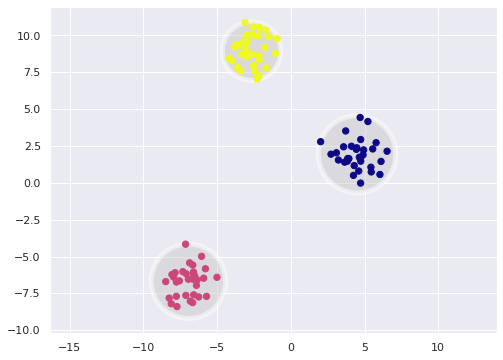

In [11]:
plt.figure(figsize=(8,6)) 
plot_kmeans(X,centroids, labels)